### Classifications

In [1]:
import pandas as pd
import pickle
import time
import proto
import plotter

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [104]:
X_train = pd.read_pickle('./data/all_features/X_train_ft.pkl')
X_test = pd.read_pickle('./data/all_features/X_test_ft.pkl')
y_train = pd.read_pickle('./data/all_features/y_train.pkl')
y_test = pd.read_pickle('./data/all_features/y_test.pkl')

print(X_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_train.shape)
print()

In [2]:
feat_types = {
    'Proto-Words/HT, Small': 'proto_small'
#     'Proto-Words/HT, Large': 'proto_large', 
#     'Topics, Small': 'topic_small', 
#     'Topics, Large': 'topic_large', 
#     'Sentiments, Small': 'sentim_small',
#     'Sentiments, Large': 'sentim_large',
#     'All, Best': 'all_features'
        }


clfs = {
        'Logistic Reg': LogisticRegression(penalty='l1', C=1e5)
#         'Random Forest': RandomForestClassifier(n_estimators=100, n_jobs=-1),
#         'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, learning_rate=0.05, subsample=0.5, max_depth=10),
#         'AdaBoost, DT': AdaBoostClassifier(DecisionTreeClassifier(max_depth=10), algorithm="SAMME", n_estimators=100),
#         'Bagging, DT': BaggingClassifier(DecisionTreeClassifier(max_depth=10), max_samples=0.5, max_features=0.5)
             }

In [5]:
def run_models(feat_types, clfs):
    for feat_key, feat_val in feat_types.items():
        X_train = pd.read_pickle('./data/{}/X_train_ft.pkl'.format(feat_val))
        X_test = pd.read_pickle('./data/{}/X_test_ft.pkl'.format(feat_val))
        y_train = pd.read_pickle('./data/{}/y_train.pkl'.format(feat_val))
        y_test = pd.read_pickle('./data/{}/y_test.pkl'.format(feat_val))
        #obj = pickle.load(open('./data/{}/obj.pkl'.format(feat_val), 'rb'))
        print(feat_key)
    
        for clf_key, clf in clfs.items():
            print(clf_key)
            start_time = time.time()
            clf_fit = clf.fit(X_train, y_train)
            predictions = clf.predict(X_test) 
            display(plotter.evaluateClassifier(clf, predictions, y_test))
            plotter.plotConfusionMatrix(clf, predictions, y_test)
            plotter.plotMultiROC(clf, predictions, X_test, y_test)
            print("--- %s minutes ---" % round((time.time() - start_time)/60, 2))
            print()
        print()

Proto-Words/HT, Small
Logistic Reg


,AUC,Average_Precision,Error_Rate,Precision,Recall
Label,,,,,
d,0.844931,0.786559,0.151956,0.807007,0.929125
r,0.844931,0.806583,0.151956,0.908824,0.760736


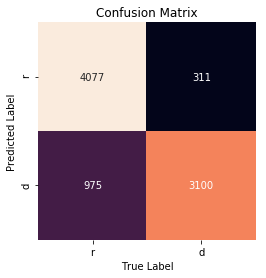

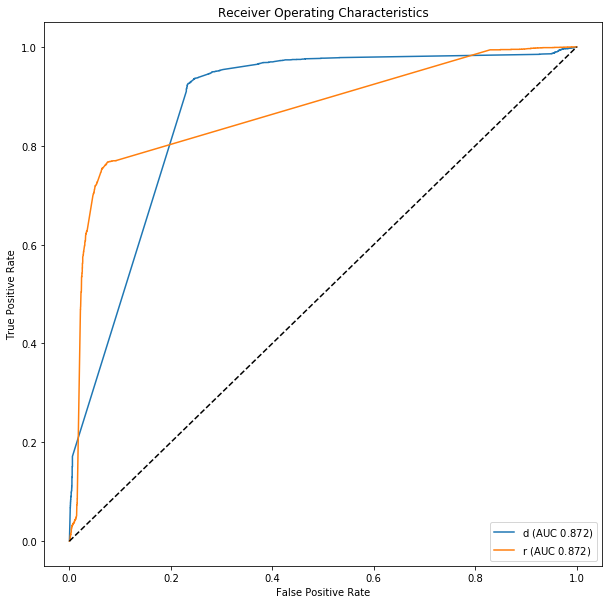

--- 0.03 minutes ---




In [7]:
run_models(feat_types, clfs)